## **Data Mining with Python**
### **Semana 8: Predictivo ``KNeighborsClassifier()``**
**Andrés C. Medina Sanhueza**

Lead Advanced Analytics Financial Retail Cencosud-Scotiabank

anmedinas@gmail.com

---
### **Distancia de Mahalanobis**

La distancia de Mahalanobis considera la variabilidad de los datos al calcular la distancia.

$$
D_{M}(p,q) = \sqrt{(X-\mu)^\top \Sigma^{-1}(X-\mu)} 
$$

Donde $\Sigma$ es la matriz de covarianza de los datos y se define como:

$$
\Sigma = \sum_{i=1}^{n}(X_i - \mu)(X_i - \mu)^\top = \tilde{X}^\top\tilde{X}
$$

Donde $X\in\mathbb{R}^{d\times d}$ y $\tilde{X}$ es la matriz centrada.

In [1]:
def mahalanobis(x = None, data = None, cov = None):
    # Centro los datos 
    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    # Calculo la inversa de la matriz de covarianza
    inv_covmat = np.linalg.inv(cov)
    # Calculo la parte izquierda de la formula 
    left = np.dot(x_mu, inv_covmat)
    # Calculo la parte derecha de la formula 
    mahal = np.dot(left, x_mu.T)
    # Retorno la distancia de Mahalanobis
    return mahal.diagonal()

In [2]:
import numpy as np
import pandas as pd 
from scipy.stats import chi2

data = {'puntos': [91, 93, 72, 87, 86, 73, 68, 87, 78, 99, 95, 76, 84, 96, 76, 80, 83, 84, 73, 74],
        'horas': [16, 6, 3, 1, 2, 3, 2, 5, 2, 5, 2, 3, 4, 3, 3, 3, 4, 3, 4, 4],
        'prep': [3, 4, 0, 3, 4, 0, 1, 2, 1, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2],
        'grado': [70, 88, 80, 83, 88, 84, 78, 94, 90, 93, 89, 82, 95, 94, 81, 93, 93, 90, 89, 89]
        }

df = pd.DataFrame(data,columns=['puntos', 'horas', 'prep','grado'])
df.head()

,puntos,horas,prep,grado
0,91,16,3,70
1,93,6,4,88
2,72,3,0,80
3,87,1,3,83
4,86,2,4,88


In [3]:
df['mahalanobis'] = mahalanobis(x=df, data=df[['puntos', 'horas', 'prep','grado']])
df.head(5)

/home/anmedinas/MEF/Trabajos_con_/Proyectos/DataminingUAI/DMUAI_202202/env_clase_dm_uai/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,puntos,horas,prep,grado,mahalanobis
0,91,16,3,70,16.501963
1,93,6,4,88,2.639286
2,72,3,0,80,4.850797
3,87,1,3,83,5.201261
4,86,2,4,88,3.828734


Podemos ver que la distancia de Mahalanobis es mucho mas larga que otro tipo de distancias. Para cuantificar si la distancia es estadisticamente significativa, podemos calcular el pvalue asociado a la distancia.

El pvalue de cada distancia es calculado el pvalue correspondiente a el estadistico $\chi^2$ de la distancia de Mahalanobis con $k-1$ grados de libertad donde $k$ es el numero de variables. En este caso, K = 4-1=3.

In [4]:
# Calculo del pvalue en la distancia de mahalanobis 
df['p'] = 1 - chi2.cdf(df['mahalanobis'], 3)
df.head()

,puntos,horas,prep,grado,mahalanobis,p
0,91,16,3,70,16.501963,0.000895
1,93,6,4,88,2.639286,0.450644
2,72,3,0,80,4.850797,0.183054
3,87,1,3,83,5.201261,0.157639
4,86,2,4,88,3.828734,0.280562


Tipicamente, un pvalue menor a 0.001 es considerado como un outliers. Por lo tanto, podemos ver que la primera observacion es un outlier en el conjunto de datos ya que el pvalue < 0.001.

---
### **Partición del Conjunto de Datos**

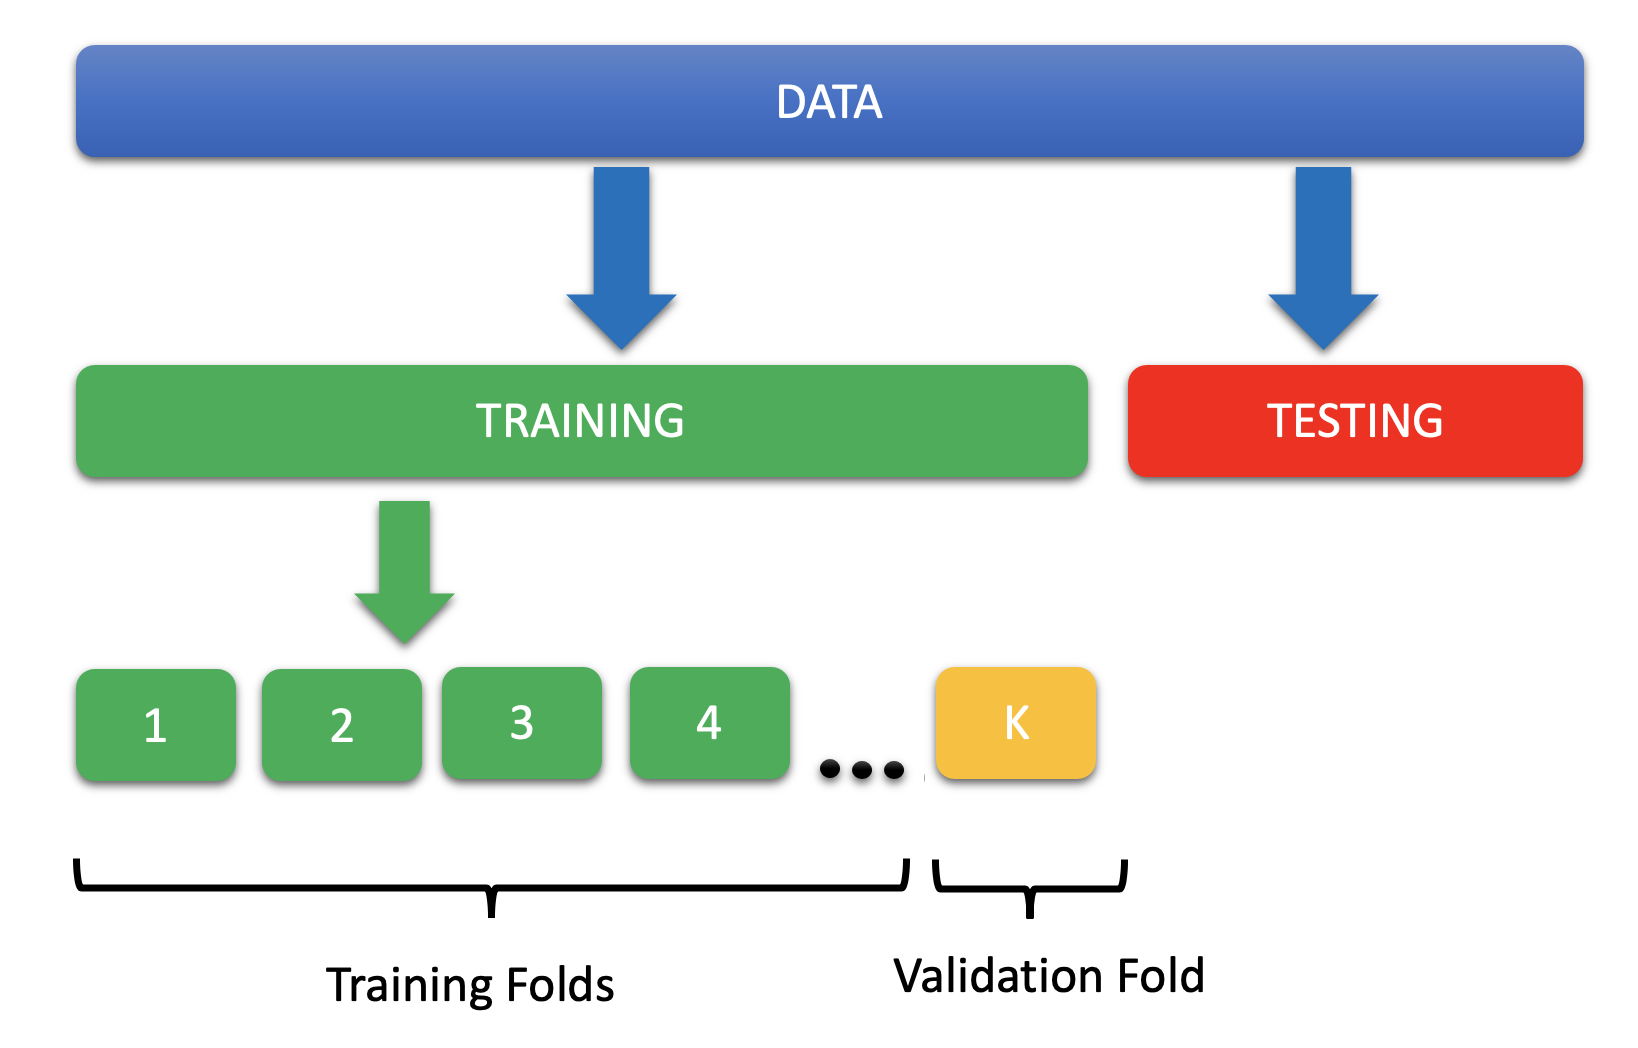

In [5]:
from IPython.display import Image
Image('figs/train_test.png')

Ante cualquier proyecto de modelamiento predictivo, es necesario generar una partición de datos en `training` y `testing`. Los porcentajes, son relativos, pero bordean entre los 70-30 u 80-20. Más adelante, veremos a que se refiere con `k-folds`.

La garantía de generar este proceso previo al entrenamiento de un modelo de clasificación o predicción, es que el modelo encontrado, tenga problemas de sobreajuste u `overfitting`. Este fenómeno es muy común cuando no se hace un proceso de partición previa y el modelo entrenado con toda la muestra, no aprende ante datos fuera de la muestra, por lo tanto, este tipo de modelos con sobreajuste tiene rendimientos deficientes.

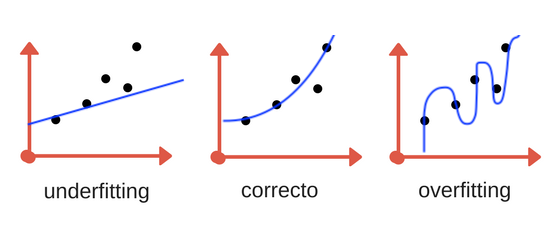

In [6]:
Image('figs/overfiting.png')

Para generar una partición en python, la sintáxis es 

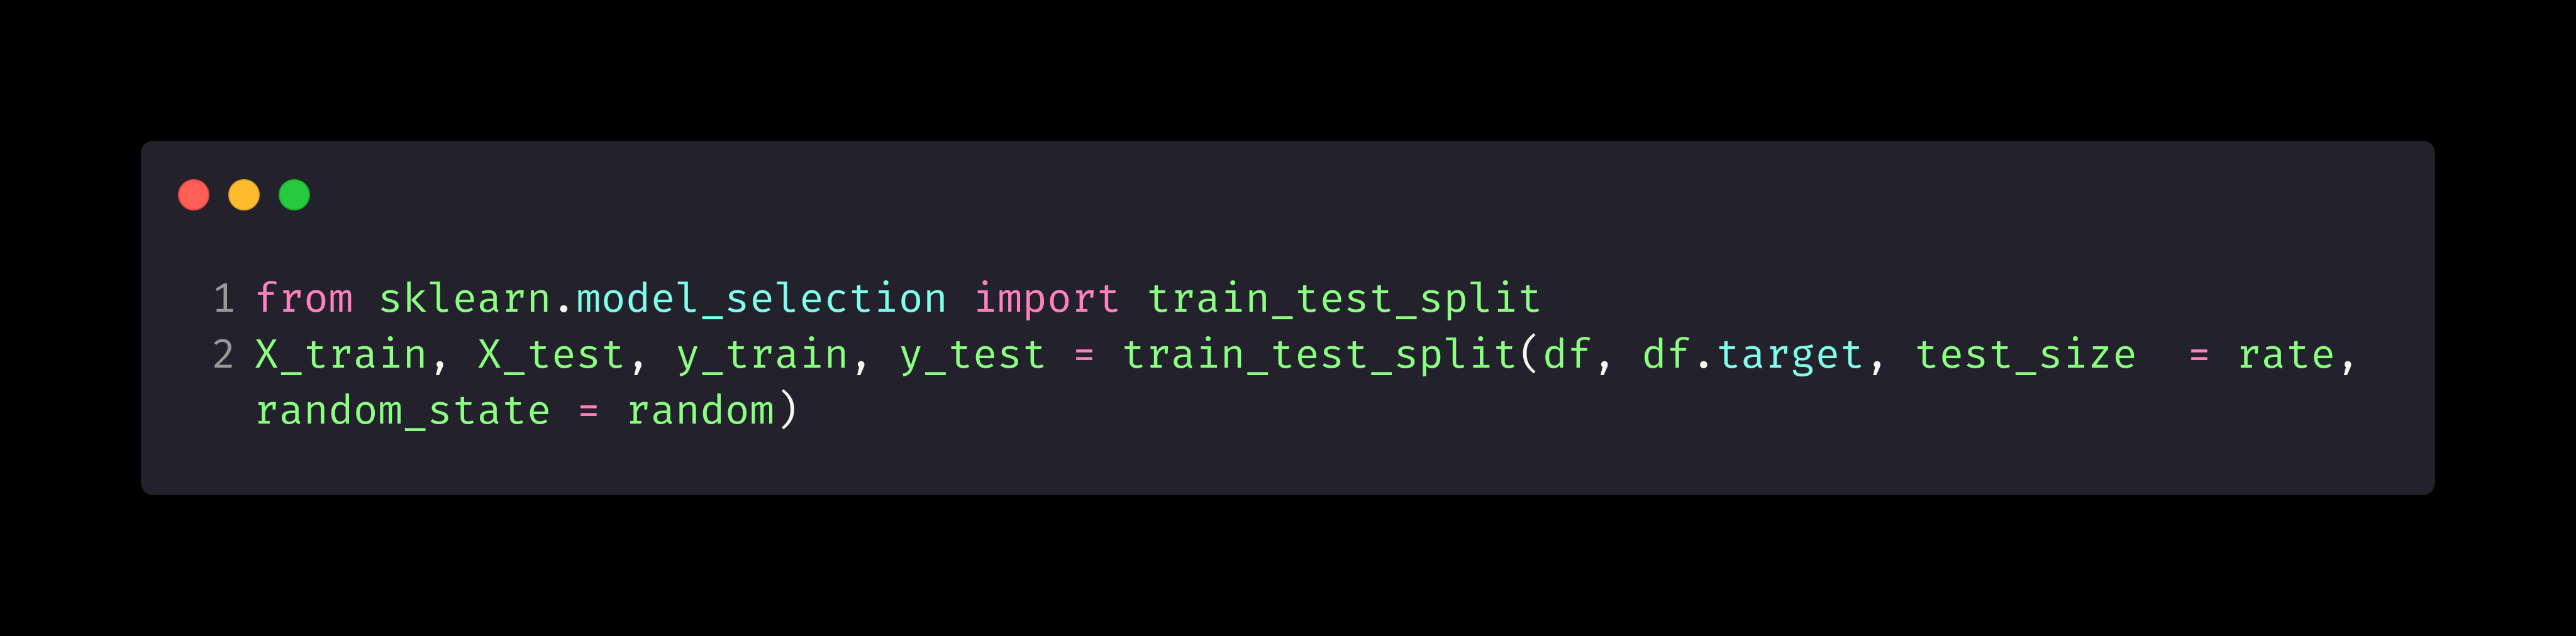

In [7]:
from IPython.display import Image
Image('figs/split.png')

---
### **Algoritmo K Nearest Neighbors**

El algoritmo `KNN` (K Nearest Neighbors) es un algoritmo de aprendizaje automático muy conocido, debido a que es fácil de entender y utilizar. `KNN` pertenece al conjunto de algoritmos de Aprendizaje Supervisado. 

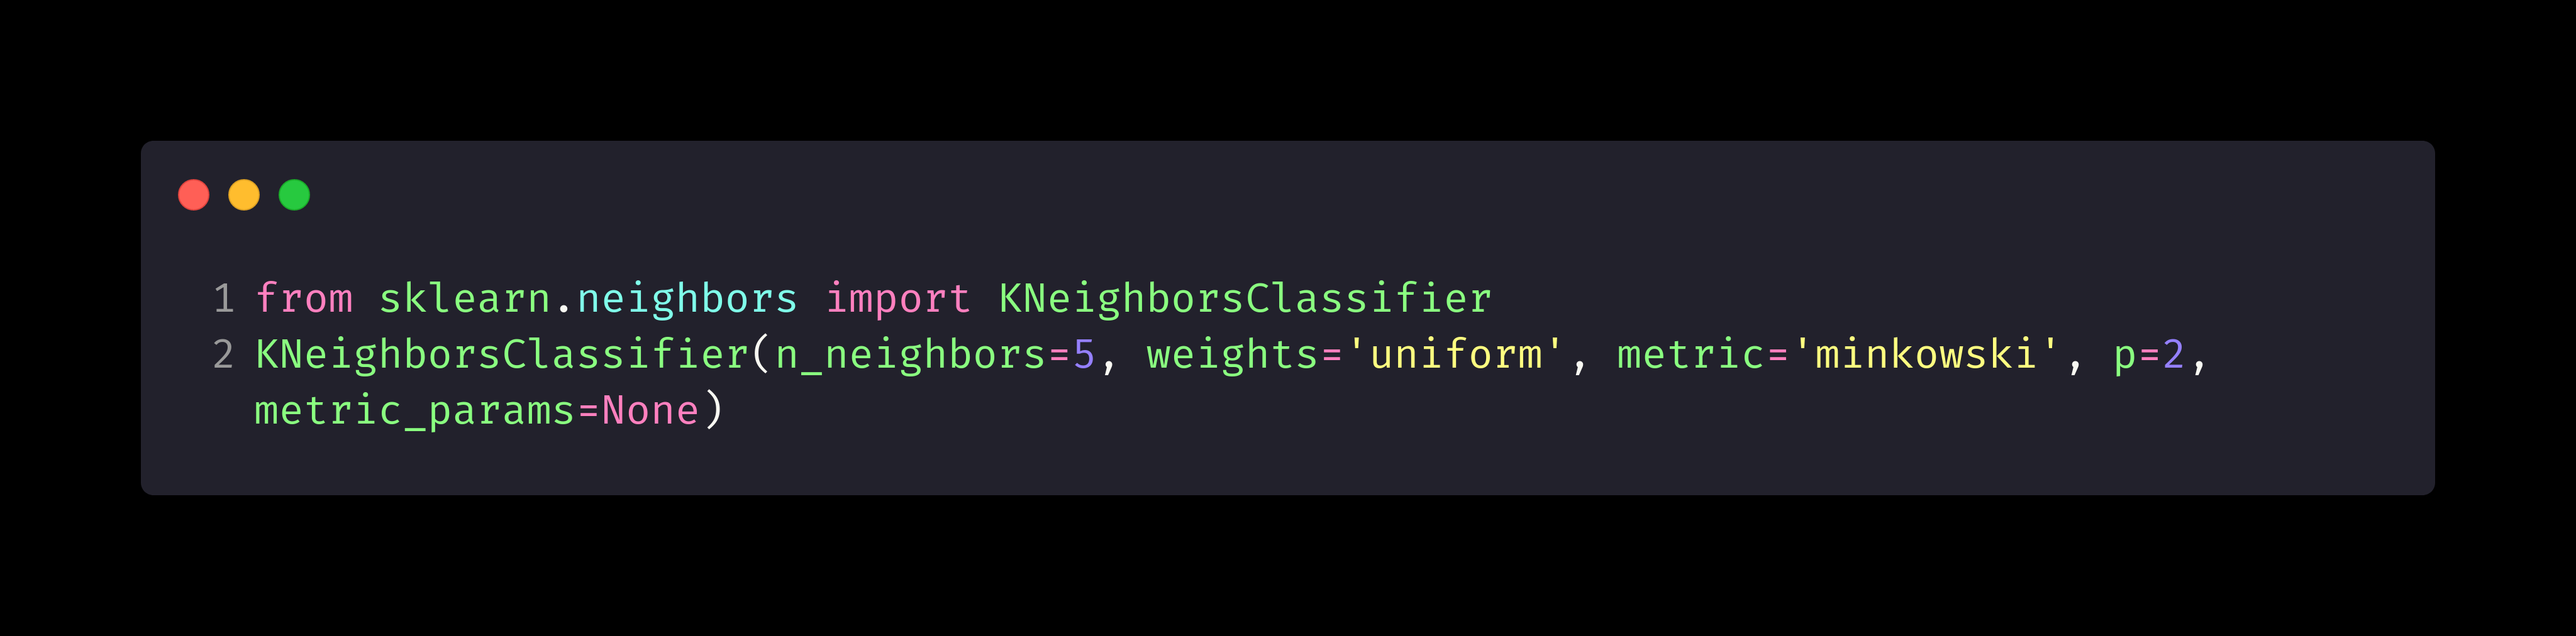

In [8]:
from IPython.display import Image
Image('figs/knn.png')

#### **Ejemplo 1: Datos Clase**

In [9]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings 
import seaborn as sns 

# Datos Clase 
data = {'x': [4,5,5,6,7,7],
        'y': [1,1,2,7,6,7],
       'clase': ['c1','c1','c1', 'c2', 'c2', 'c2']}

punto_nuevo = {'x':[1], 'y':[5]}

df = pd.DataFrame(data)
punto_nuevo = pd.DataFrame(punto_nuevo)
df

,x,y,clase
0,4,1,c1
1,5,1,c1
2,5,2,c1
3,6,7,c2
4,7,6,c2
5,7,7,c2


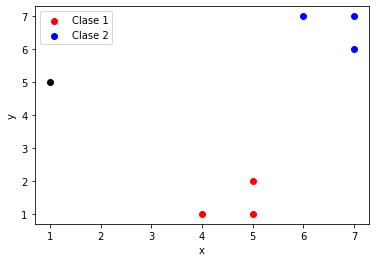

In [10]:
# plotear el nuevo punto
ax = plt.axes()
ax.scatter(df.loc[df['clase'] == 'c1', 'x'], df.loc[df['clase'] == 'c1', 'y'], c="red", label="Clase 1")
ax.scatter(df.loc[df['clase'] == 'c2', 'x'], df.loc[df['clase'] == 'c2', 'y'], c="blue", label="Clase 2")
ax.scatter(punto_nuevo['x'], punto_nuevo['y'], c="black")
plt.xlabel("x")
plt.ylabel("y")
ax.legend()
plt.show()

In [11]:
# ¿ Como lo clasifica KNN ? 
knn = KNeighborsClassifier(n_neighbors = 3)
X = df[['x', 'y']]
y = df[['clase']]
knn.fit(X, y)
prediccion = knn.predict(punto_nuevo)
print(prediccion)

['c1']


/home/anmedinas/MEF/Trabajos_con_/Proyectos/DataminingUAI/DMUAI_202202/env_clase_dm_uai/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/anmedinas/MEF/Trabajos_con_/Proyectos/DataminingUAI/DMUAI_202202/env_clase_dm_uai/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


---
#### **Ejemplo 2: Masa Corporal y Altura**

In [12]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings 
import seaborn as sns 

# Omite Warnings 
warnings.simplefilter("ignore")

# Datos  
data = {'Masa': [50, 80, 90, 45, 60],
        'Altura': [1.48, 1.82, 1.85, 1.55, 1.60],
        'Genero': ['m', 'h', 'h', 'm', 'm']}

In [13]:
# Agrego un nuevo punto 
punto_nuevo = {'Masa': [70],
               'Altura': [1.82]}

df = pd.DataFrame(data)
punto_nuevo = pd.DataFrame(punto_nuevo)
df

,Masa,Altura,Genero
0,50,1.48,m
1,80,1.82,h
2,90,1.85,h
3,45,1.55,m
4,60,1.60,m


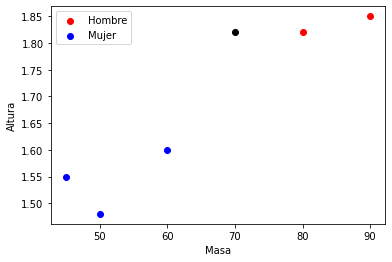

In [14]:
# plotear el nuevo punto
ax = plt.axes()
ax.scatter(df.loc[df['Genero'] == 'h', 'Masa'], df.loc[df['Genero'] == 'h', 'Altura'], c="red", label="Hombre")
ax.scatter(df.loc[df['Genero'] == 'm', 'Masa'], df.loc[df['Genero'] == 'm', 'Altura'], c="blue", label="Mujer")
ax.scatter(punto_nuevo['Masa'], punto_nuevo['Altura'], c="black")
plt.xlabel("Masa")
plt.ylabel("Altura")
ax.legend()
plt.show()

In [15]:
# ¿ Como lo clasifica KNN ? 
knn = KNeighborsClassifier(n_neighbors = 3)
X = df[['Masa', 'Altura']]
y = df[['Genero']]
knn.fit(X, y)
prediccion = knn.predict(punto_nuevo)
print(prediccion)

['h']


---
### **Clase `KNeighborsClassifier()`**

Existen multiples parametros para el modelo `knn`. Para utilizar la clase `KNeighborsClassifier()` en python, se hace de la siguiente forma:

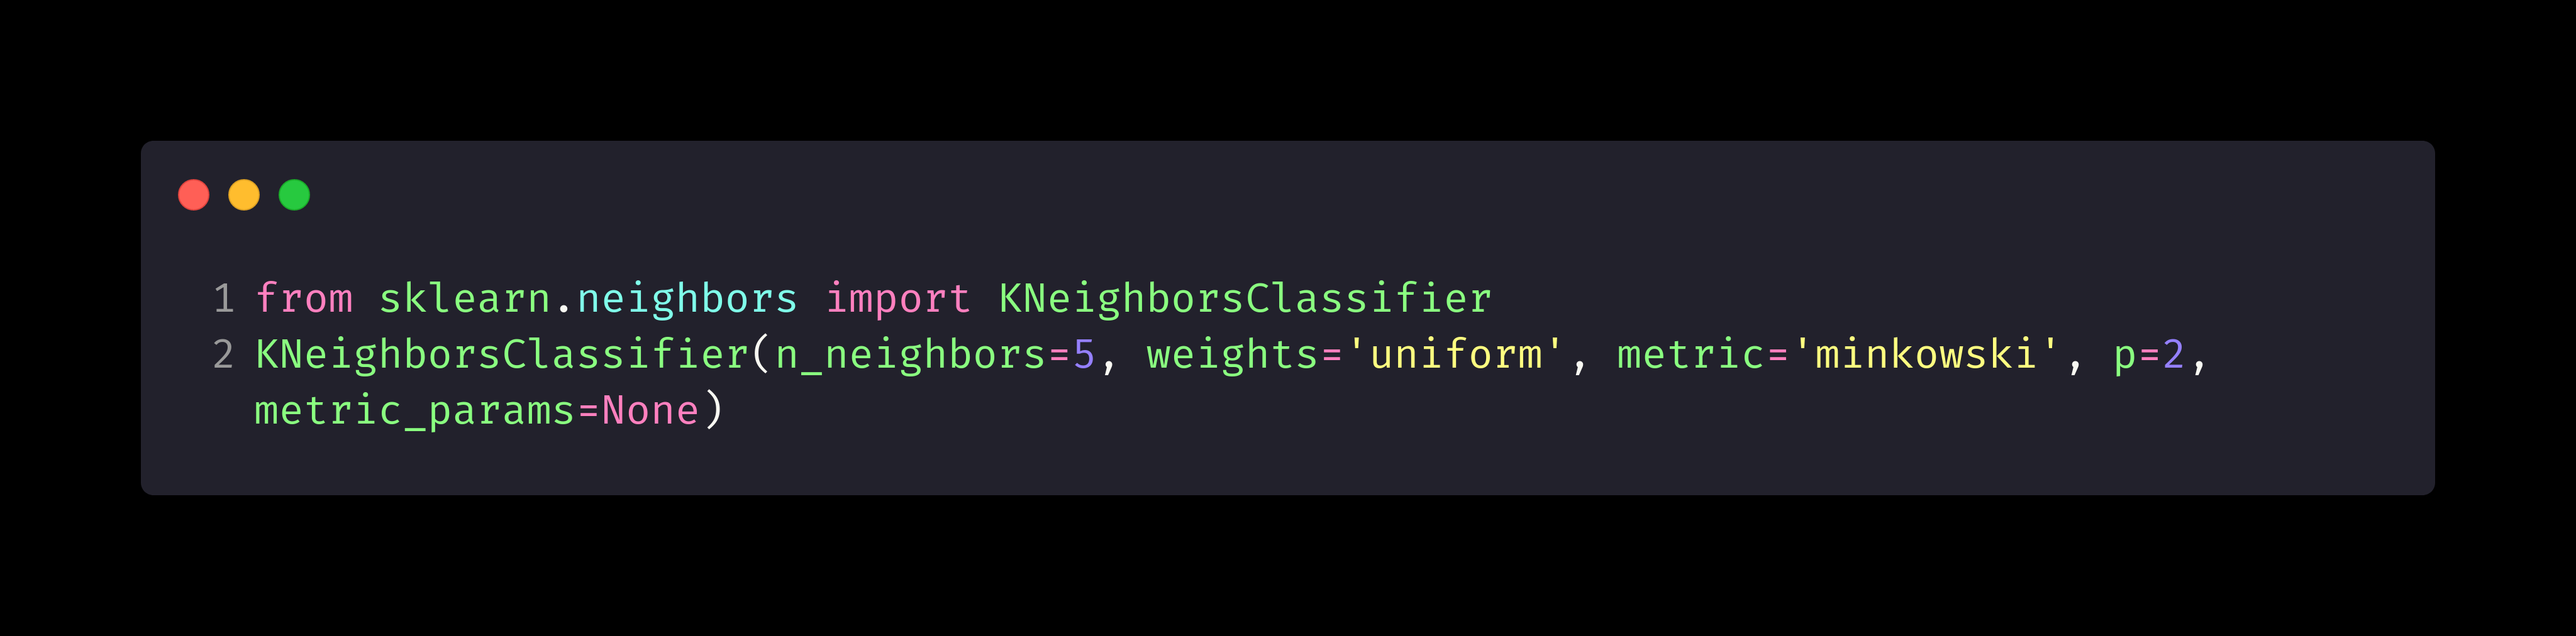

In [16]:
Image('figs/knn.png')

**Parámetros:**

1. `n_neighbors:` número de vecino a utilizar.
2. `weights:` pesos o ponderadores a utilizar en la clasificación (`uniform`, `distance`: mayor importancia a los puntos cercanos).
3. `metric:` Métrica de distancia a utilizar entre los puntos $\mathbf x_1$ y $\mathbf x_2$, cada uno con $d$ dimensiones:
    * `euclidean:` $\Rightarrow\sqrt{\sum_{i=1}^d(x_{1,d} - x_{2,d})^2}$<br>
    * `manhattan:` $\Rightarrow\sum_{i=1}^d|x_{1,d} - x_{2,d}|$<br>
    * `chebyshev:` $\Rightarrow\max_{i\in\{1\ldots d\}}|x_{1,d} - x_{2,d}|$<br>
    * `MinkowskiDistance:`, con parametro $p$ $\Rightarrow\left(\sum_{i=1}^d(x_{1,d} - x_{2,d})^p\right)^{1/p}$<br>
    *`mahalanobis`, con parámetro $V$, $\sqrt{(\mathbf x_1-\mathbf x_2)^TV^{-1}(\mathbf x_1-\mathbf x_2)}$
4. `p:` parámetro de la métrica de Minkowsky (2 es equivalente a la distancia Euclidiana)
5. `metrics_params:` parámetros específicos de la métrica
6. `algorithm:` algoritmo para buscar los vecinos más cercanos, en caso de Mahalanobis debe ser `brute`.

**Atributos:**
    
1. `classes_:` Etiquetas de los puntos conocidos.
2. `effective_metric_:` Métrica de distancia.
3. `n_samples_fit_:` número de puntos de "entrenamiento". 

**Métodos/funciones**

1. `fit(X, y):` "Entrenamiento" del modelo, se tiene que dar los datos y la clase $Y$.
2. `kneighbors([X, n_neighbors, return_distance]):` Muestra los K-vecinos de un punto.
3. `predict(X):` predice las etiquetas para los puntos dados.
4. `predict_proba(X):` predice las probabilidades de las clases para los puntos dados.

---
#### **Ejemplo 3: Iris Data**

In [17]:
from sklearn import datasets 
from matplotlib import pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from plotnine import * 
import pandas as pd 
import numpy as np
import warnings 
import seaborn as sns 

# Omite Warnings 
warnings.simplefilter("ignore")

# Configuracion Entorno Plot
sns.set(rc={'figure.figsize':(5.27,5.27)})

In [18]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [19]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


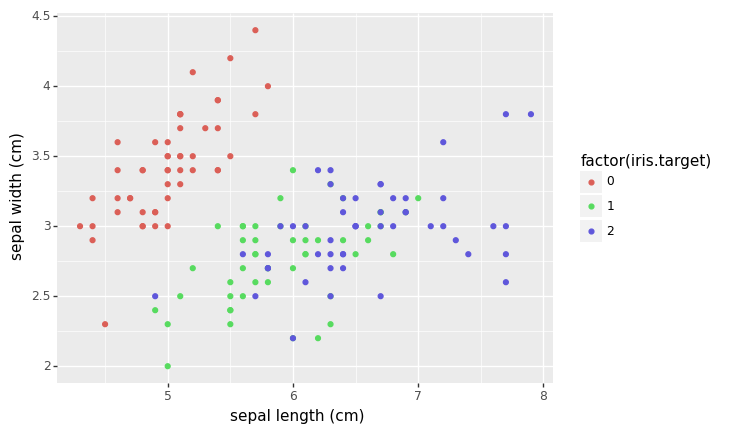

<ggplot: (8732212669730)>

In [20]:
(
    ggplot(df) + aes(x="sepal length (cm)", y="sepal width (cm)",color="factor(iris.target)") + 
    geom_point()
)

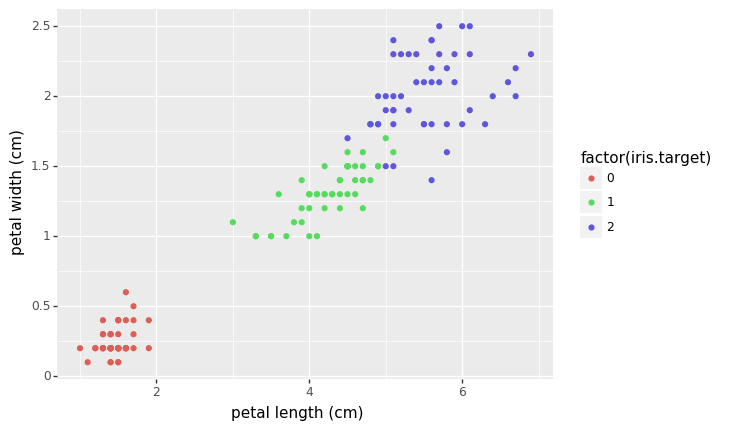

<ggplot: (8732209285367)>

In [21]:
( 
    ggplot(df) + 
    aes(x="petal length (cm)", y="petal width (cm)", color="factor(iris.target)") + 
    geom_point()
)

In [22]:
# Particion de los Datos Iris 
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.30, random_state=42)

# Se crea el objeto KNeighborsClassifier()
KNN = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform')

# Entreno el modelo con los datos de iris 
KNN = KNN.fit(X_train, y_train)

# Aplico el Modelo a otros datos 
result = KNN.predict(X_test)

In [23]:
# Resultado de la prediccion 
print("Resultado de la predicción:\n", result)

Resultado de la predicción:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [24]:
# Resultado Original 
print("Resultado original:\n",y_test)

Resultado original:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [25]:
# Aplico el modelo a otros datos 
result2 = KNN.predict_proba(X_test)
print("Resultado de la predicción:\n", result2)

Resultado de la predicción:
 [[0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]
 [0.         0.66666667 0.33333333]
 [0.         1.         0.        ]
 [0.         0.33333333 0.66666667]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [0.         0.         1.        ]
 [0.         0.         1.        ]
 [0.         0.         1.        ]

---
#### **Ejemplo 4: Datos de Orbitas**

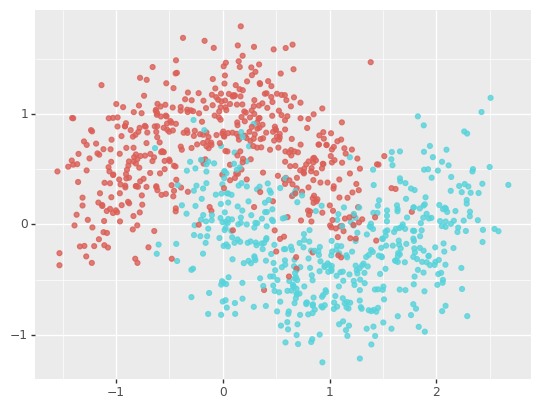

<ggplot: (8732209289900)>

In [26]:
from sklearn.datasets import make_moons
df = make_moons(n_samples = 1000, shuffle=True, noise = 0.3, random_state = None)
(
    ggplot() + 
    aes(x = df[0][:,0],y=df[0][:,1], color = list(map(str,df[1]))) + 
    geom_point(show_legend=False, alpha=0.8)
)

In [27]:
# Entrenando el modelo 
KNN = KNeighborsClassifier(n_neighbors=10)
KNN = KNN.fit(df[0],df[1])

In [28]:
# Creando una grilla de evaluación
x = np.arange(-2.0, 3.5, 0.05)
y = np.arange(-1.5, 2.5, 0.05)
tmp = np.meshgrid(x, y)
dataTest = pd.DataFrame(tmp[0].flatten(), columns = ["xx"])
dataTest.insert(1,"yy",tmp[1].flatten())

In [29]:
# Prediciendo y graficando el output
label = KNN.predict(dataTest)

# Creando el dataframe a graficar
dataTest["label"] = label

In [30]:
dataTest.head(5)

,xx,yy,label
0,-2.00,-1.5,0
1,-1.95,-1.5,0
2,-1.90,-1.5,0
3,-1.85,-1.5,0
4,-1.80,-1.5,0


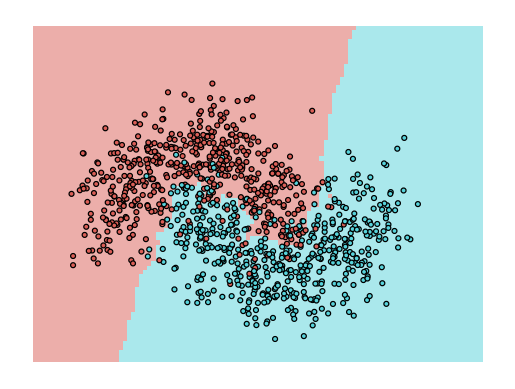

<ggplot: (8732209271543)>

In [31]:
# Generando el gráfico con ggplot/plotnine
(
    ggplot() + 
    theme_void() +
    geom_tile(aes(x = dataTest.xx, y = dataTest.yy, fill = list(map(str, dataTest.label))), alpha = 0.5, show_legend = False) + 
    geom_point(aes(x=df[0][:,0],y=df[0][:,1],fill=list(map(str,df[1]))),show_legend=False,color = "black")
)

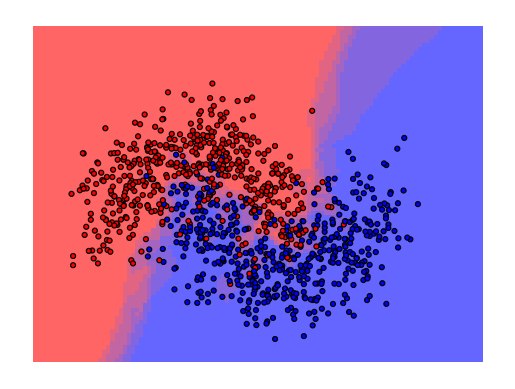

<ggplot: (8732209088744)>

In [32]:
# Entrenando el modelo y aplicando a una grilla de puntos para su visualización
KNN = KNeighborsClassifier(n_neighbors=5)
KNN = KNN.fit(df[0],df[1])

# Creando una grilla de evaluación
x = np.arange(-2.0, 3.5, 0.05)
y = np.arange(-1.5, 2.5, 0.05)
temp = np.meshgrid(x, y)
dataTest = pd.DataFrame(temp[0].flatten(),columns=["xx"])
dataTest.insert(1,"yy",temp[1].flatten())

# Prediciendo y graficando el output
estimatedProbs=KNN.predict_proba(dataTest.iloc[:,0:2])

# Creando el dataframe a graficar
output=(((1-estimatedProbs[:,0])*255).astype("int"))
dataTest.insert(2, "ClassOutput", "0")
for i in range(dataTest.shape[0]):
    dataTest.ClassOutput[i]='#%02x%02x%02x' % (255-output[i],0,output[i])

# Colores para los puntos originales
colorData = pd.DataFrame(list(map(str,df[1])), columns = ["colorClass"])
colorData.colorClass[colorData.colorClass == "0"] = "Red"
colorData.colorClass[colorData.colorClass == "1"] = "Blue"
    
# Generating the plot with ggplot/plotnine
(
    ggplot() + 
    theme_void() + 
    geom_tile(aes(x=dataTest.xx,y=dataTest.yy),alpha=0.6,show_legend=False,fill=dataTest.ClassOutput) + 
    geom_point(aes(x=df[0][:,0],y=df[0][:,1]),show_legend=False,color="black",fill=colorData)
)